In [1]:
# importing the requierd libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


plt.style.use('dark_background')

In [2]:
# reading the csv file and importing the data 
# loading the required csv dataset 

df = pd.read_csv('calories_consumed.csv')
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
df.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [4]:
df.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [6]:
# counting the number of the null values in the given dataset.
# as we can see there are no null values in this given dataset.


df.isnull().sum()

Weight gained (grams)    0
Calories Consumed        0
dtype: int64

In [7]:
df.isnull().count()

Weight gained (grams)    14
Calories Consumed        14
dtype: int64

<Axes: >

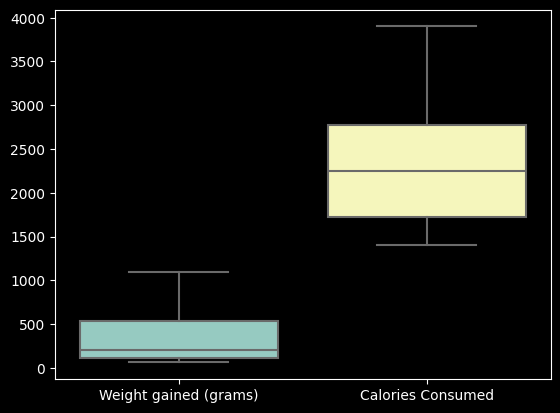

In [8]:
# from this BoxPlot we can get to know that there are no outliers in this data 

sns.boxplot(df )

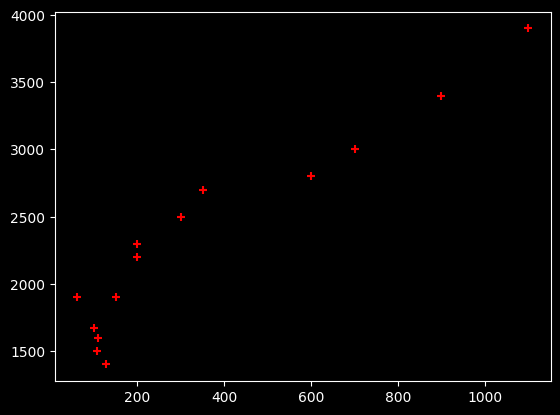

In [9]:
# visualizing the given data points using the scatter plot for getting insights about the relationship of this both columns in the dataset

plt.scatter(x = df['Weight gained (grams)'], y = df['Calories Consumed'], marker = '+', color = 'red')

### Splitting the data into the input and the target:

In [10]:
input = df.drop('Weight gained (grams)', axis = 'columns')
input.head()

,Calories Consumed
0,1500
1,2300
2,3400
3,2200
4,2500


In [11]:
target = df.drop('Calories Consumed', axis = 'columns')
target.head()

,Weight gained (grams)
0,108
1,200
2,900
3,200
4,300


### Model Implementation:

In [12]:
# Implementing the linear regression model for this problem statement 

model = LinearRegression()

In [13]:
# Training our model using the given dataset 

model.fit(input, target)

LinearRegression()

In [14]:
model.score(input, target)

0.8967919708530552

### Modle visualization:

<Axes: xlabel='Weight gained (grams)', ylabel='Calories Consumed'>

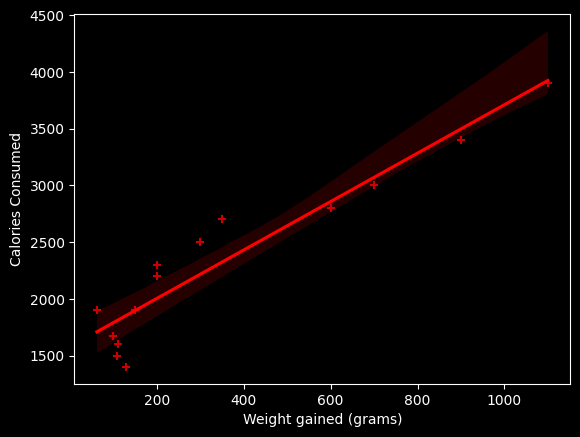

In [16]:
# this is the best fit line for the data using the linear regression model

sns.regplot(x = 'Weight gained (grams)', y = 'Calories Consumed', data = df , color = 'red', marker = '+')

In [17]:
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

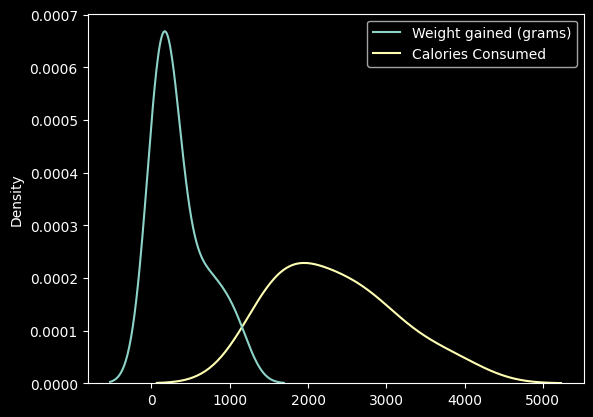

In [25]:
sns.kdeplot(df)

# Here we can see that the data is right scewed 
# for handling this scewed data we will use the normalization technique

In [26]:
# writing a normalization function for normalizing the given data.

def norm(x):
    d = (x-x.min())/(x.max()-x.min())
    return d

In [27]:
data = norm(df)
data.head()

# here is our normalized data 

,Weight gained (grams),Calories Consumed
0,0.044316,0.04
1,0.132948,0.36
2,0.807322,0.80
3,0.132948,0.32
4,0.229287,0.44


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

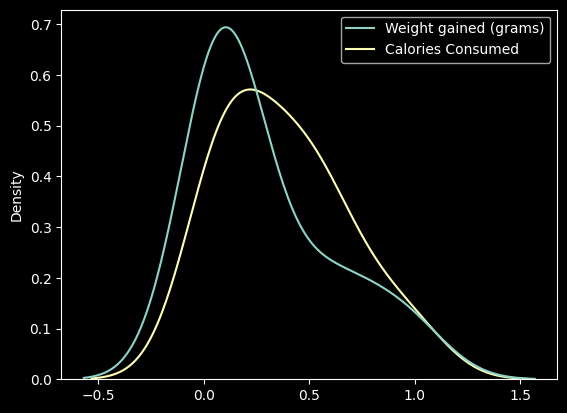

In [24]:
sns.kdeplot(data)

# here the scewness of the data is much more reduced due to normalization of the data 

#### Dividing the Normalized data into input and the target features 

In [31]:
x = data.drop('Weight gained (grams)', axis = 'columns')
x.head()

,Calories Consumed
0,0.04
1,0.36
2,0.80
3,0.32
4,0.44


In [32]:
y = data.drop('Calories Consumed', axis = 'columns')
y.head()

,Weight gained (grams)
0,0.044316
1,0.132948
2,0.807322
3,0.132948
4,0.229287


#### now we can apply the linear regression model to our normalized data for the better predictions

In [29]:
model1 = LinearRegression()

# initializing the model class object 

In [33]:
model1.fit(x, y)

LinearRegression()

In [35]:
model1.score(x, y)

0.8967919708530552

### Using the Log Transformation for the right scewed data :

In [37]:
data1 = np.log(df)
data1.head()

,Weight gained (grams),Calories Consumed
0,4.682131,7.313220
1,5.298317,7.740664
2,6.802395,8.131531
3,5.298317,7.696213
4,5.703782,7.824046


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

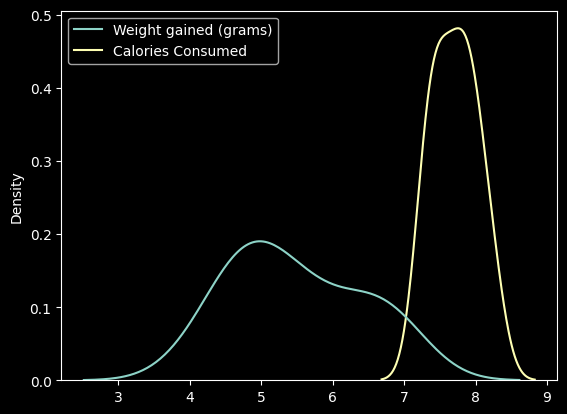

In [40]:
sns.kdeplot(data1)

In [41]:
ip = data1.drop('Calories Consumed', axis= 'columns')
ip.head()

,Weight gained (grams)
0,4.682131
1,5.298317
2,6.802395
3,5.298317
4,5.703782


In [42]:
tg = data1.drop('Weight gained (grams)', axis = 'columns')
tg.head()

,Calories Consumed
0,7.313220
1,7.740664
2,8.131531
3,7.696213
4,7.824046


In [43]:
model2 = LinearRegression()

In [44]:
model2.fit(ip, tg)

LinearRegression()

In [46]:
model2.score(ip, tg)

0.8464957571780118

### Using both normalization and the log transformation:

In [47]:
data.head()

,Weight gained (grams),Calories Consumed
0,0.044316,0.04
1,0.132948,0.36
2,0.807322,0.80
3,0.132948,0.32
4,0.229287,0.44


In [48]:
data_log = np.log(data)
data_log.head()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Weight gained (grams),Calories Consumed
0,-3.116410,-3.218876
1,-2.017797,-1.021651
2,-0.214033,-0.223144
3,-2.017797,-1.139434
4,-1.472780,-0.820981
